Natural Language Processing using NLTK

In [ ]:
pip install nltk

In [ ]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web.

In [ ]:
import urllib
import bs4 as bs
import re

In [ ]:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.
source = urllib.request.urlopen(url).read()

soup = bs.BeautifulSoup(source,"html.parser")
text = ""

for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)


In [ ]:
text[:100]


' in common usage, climate change describes global warming—the ongoing increase in global average tem'

<Figure size 640x480 with 0 Axes>

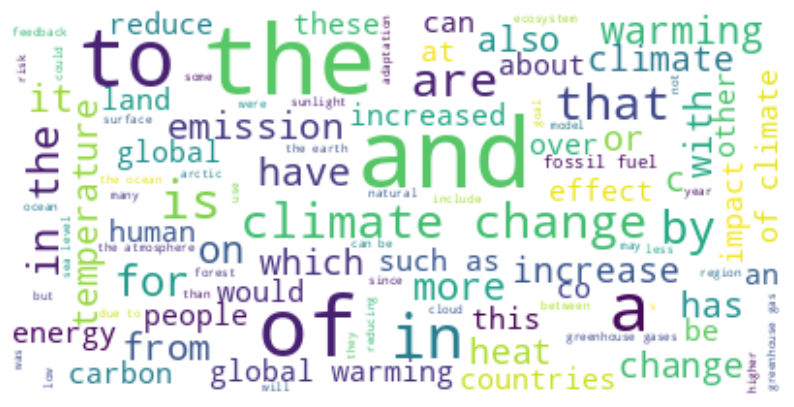

In [ ]:
# Redos the word cloud but set stopwords to empty so it looks really bad
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(text))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##NLP Part 1 - Tokenization of paragraphs/sentences

---

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization".

You should also spend time on the NLTK documentation. If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!

In [ ]:
'''
TODO: Tokenize the first 100 character from the text using word_tokenize and set it to a variable called words.
print first 10 words.
Hint: how to do this might be on the very home page of NLTK!
'''
from nltk.tokenize import word_tokenize

tokenize_text = text[:100]
tokens = nltk.word_tokenize(tokenize_text)
print(tokens[:10])

['in', 'common', 'usage', ',', 'climate', 'change', 'describes', 'global', 'warming—the', 'ongoing']


In [ ]:
'''
TODO: Tokenize all the sentences from the text using  sent_tokenize and set it to a variable called -> sentences.
print first 10
Hint: try googling how to tokenize sentences in NLTK!
'''

from nltk.tokenize import sent_tokenize

tokenize_sentence = text
sentences = nltk.sent_tokenize(tokenize_sentence)
print(sentences[:10])


[" in common usage, climate change describes global warming—the ongoing increase in global average temperature—and its effects on earth's climate system.", "climate change in a broader sense also includes previous long-term changes to earth's climate.", 'the current rise in global average temperature is more rapid than previous changes, and is primarily caused by humans burning fossil fuels.', 'fossil fuel use, deforestation, and some agricultural and industrial practices increase greenhouse gases, notably carbon dioxide and methane.', 'greenhouse gases absorb some of the heat that the earth radiates after it warms from sunlight.', "larger amounts of these gases trap more heat in earth's lower atmosphere, causing global warming.", 'due to climate change, deserts are expanding, while heat waves and wildfires are becoming more common.', 'increased warming in the arctic has contributed to melting permafrost, glacial retreat and sea ice loss.', 'higher temperatures are also causing more in

##NLP Part 2 - Stopwords and Punctuation
---
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet.

In [ ]:
from nltk.parse.transitionparser import remove
nltk.download('stopwords')
from nltk.corpus import stopwords

'''
TODO: Define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
Hint1: For each sentence use word tokenization
Hint2: Check each words and see are they part of stop_words or not - use syntax: not in
Hint3: Remove the words which are common in both
Hint4: join the words and create the sentence and append in filtered_sentences - ' '.join()
'''


def remove_stopwords(sentences):
  stop_words = set(stopwords.words('english'))
  return [' '.join([word for word in sentence.split() if word.lower() not in stop_words]) for sentence in sentences]

sentences = remove_stopwords(sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sentences[:10]

["common usage, climate change describes global warming—the ongoing increase global average temperature—and effects earth's climate system.",
 "climate change broader sense also includes previous long-term changes earth's climate.",
 'current rise global average temperature rapid previous changes, primarily caused humans burning fossil fuels.',
 'fossil fuel use, deforestation, agricultural industrial practices increase greenhouse gases, notably carbon dioxide methane.',
 'greenhouse gases absorb heat earth radiates warms sunlight.',
 "larger amounts gases trap heat earth's lower atmosphere, causing global warming.",
 'due climate change, deserts expanding, heat waves wildfires becoming common.',
 'increased warming arctic contributed melting permafrost, glacial retreat sea ice loss.',
 'higher temperatures also causing intense storms, droughts, weather extremes.',
 'rapid environmental change mountains, coral reefs, arctic forcing many species relocate become extinct.']

In [ ]:
'''
TODO: Define a function called "remove_punctuation" that removes punctuation from the sentences.
HINT: Use a nested for loop to iterate over each character in the sentence.
Check if the character is not in the punctuation string using the not in operator.
If the character is not a punctuation character, concatenate it to the filtered_sentence string.
'''
import string
def remove_punctuation(sentences):
    punctuation = string.punctuation
    filtered_sentences = []

    for sentence in sentences:
      sent = sentence.translate(str.maketrans('', '', string.punctuation))
      filtered_sentences.append(sent)

    return filtered_sentences

punc_sent = remove_punctuation(sentences)

In [ ]:
punc_sent[:10]

['common usage climate change describes global warming—the ongoing increase global average temperature—and effects earths climate system',
 'climate change broader sense also includes previous longterm changes earths climate',
 'current rise global average temperature rapid previous changes primarily caused humans burning fossil fuels',
 'fossil fuel use deforestation agricultural industrial practices increase greenhouse gases notably carbon dioxide methane',
 'greenhouse gases absorb heat earth radiates warms sunlight',
 'larger amounts gases trap heat earths lower atmosphere causing global warming',
 'due climate change deserts expanding heat waves wildfires becoming common',
 'increased warming arctic contributed melting permafrost glacial retreat sea ice loss',
 'higher temperatures also causing intense storms droughts weather extremes',
 'rapid environmental change mountains coral reefs arctic forcing many species relocate become extinct']

##NLP Part 3a - Stemming the words
---
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [ ]:
  ## NLP Part 3a - Stemming the words

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')


'troubl'

In [ ]:

'''
TODO: Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
Hint1: For each sentence use word tokenization
Hint2: Stem all the words
Hint3: join the words and create the sentence and append in stemmed_sentences - ' '.join()
'''

def stem_sentences(sentences):
    stemmer = PorterStemmer()
    stemmed_sentences = []

    for sentence in sentences:
      words = nltk.word_tokenize(sentence)
      stemmed_words = [stemmer.stem(word) for word in words]
      stemmed_sentences.append(" ".join(stemmed_words))

    return stemmed_sentences

stem_sent = stem_sentences(punc_sent)

In [ ]:
stem_sent[:10]

['common usag climat chang describ global warming—th ongo increas global averag temperature—and effect earth climat system',
 'climat chang broader sens also includ previou longterm chang earth climat',
 'current rise global averag temperatur rapid previou chang primarili caus human burn fossil fuel',
 'fossil fuel use deforest agricultur industri practic increas greenhous gase notabl carbon dioxid methan',
 'greenhous gase absorb heat earth radiat warm sunlight',
 'larger amount gase trap heat earth lower atmospher caus global warm',
 'due climat chang desert expand heat wave wildfir becom common',
 'increas warm arctic contribut melt permafrost glacial retreat sea ice loss',
 'higher temperatur also caus intens storm drought weather extrem',
 'rapid environment chang mountain coral reef arctic forc mani speci reloc becom extinct']

##NLP Part 3b - Lemmatization
---
Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).

In [ ]:
## NLP Part 3b - Lemmatization

from nltk.stem import WordNetLemmatizer

## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("corpora")

'corpus'

In [ ]:

'''
TODO: Define a function called "lem_sentences" that: loops through the sentences,
split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence

def lem_sentences(sentences):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in sentence.split()]) for sentence in sentences]

lem_sent = lem_sentences(sentences)
lem_sent[:10]

["common usage, climate change describes global warming—the ongoing increase global average temperature—and effect earth's climate system.",
 "climate change broader sense also includes previous long-term change earth's climate.",
 'current rise global average temperature rapid previous changes, primarily caused human burning fossil fuels.',
 'fossil fuel use, deforestation, agricultural industrial practice increase greenhouse gases, notably carbon dioxide methane.',
 'greenhouse gas absorb heat earth radiates warms sunlight.',
 "larger amount gas trap heat earth's lower atmosphere, causing global warming.",
 'due climate change, desert expanding, heat wave wildfire becoming common.',
 'increased warming arctic contributed melting permafrost, glacial retreat sea ice loss.',
 'higher temperature also causing intense storms, droughts, weather extremes.',
 'rapid environmental change mountains, coral reefs, arctic forcing many specie relocate become extinct.']

##NLP Part 4 - POS Tagging
---
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [ ]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)

nltk.download('averaged_perceptron_tagger')
all_words = nltk.word_tokenize(text)
tagged_words = nltk.pos_tag(all_words)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
tagged_words[4:20]

[('climate', 'NN'),
 ('change', 'NN'),
 ('describes', 'VBZ'),
 ('global', 'JJ'),
 ('warming—the', 'NN'),
 ('ongoing', 'VBG'),
 ('increase', 'NN'),
 ('in', 'IN'),
 ('global', 'JJ'),
 ('average', 'JJ'),
 ('temperature—and', 'NN'),
 ('its', 'PRP$'),
 ('effects', 'NNS'),
 ('on', 'IN'),
 ('earth', 'NN'),
 ("'s", 'POS')]

In [ ]:
## Creates a list of lists where each element of the list is [word,partofspeech abbreviation]
# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)
'''
TODO: print the first 1000 characters of tagged_paragraph.
'''
# WRITE YOUR CODE HERE #
print(tagged_paragraph[:1000])

in_IN common_JJ usage_NN ,_, climate_NN change_NN describes_VBZ global_JJ warming—the_NN ongoing_VBG increase_NN in_IN global_JJ average_JJ temperature—and_NN its_PRP$ effects_NNS on_IN earth_NN 's_POS climate_NN system_NN ._. climate_NN change_NN in_IN a_DT broader_JJR sense_NN also_RB includes_VBZ previous_JJ long-term_JJ changes_NNS to_TO earth_NN 's_POS climate_NN ._. the_DT current_JJ rise_NN in_IN global_JJ average_JJ temperature_NN is_VBZ more_RBR rapid_JJ than_IN previous_JJ changes_NNS ,_, and_CC is_VBZ primarily_RB caused_VBN by_IN humans_NNS burning_VBG fossil_JJ fuels_NNS ._. fossil_NN fuel_NN use_NN ,_, deforestation_NN ,_, and_CC some_DT agricultural_JJ and_CC industrial_JJ practices_NNS increase_NN greenhouse_NN gases_NNS ,_, notably_RB carbon_NN dioxide_NN and_CC methane_NN ._. greenhouse_NN gases_NNS absorb_VBP some_DT of_IN the_DT heat_NN that_IN the_DT earth_NN radiates_VBZ after_IN it_PRP warms_VBZ from_IN sunlight_NN ._. larger_JJR amounts_NNS of_IN these_DT gases_

##Word2Vec Model Visualization
---

In [ ]:
# Word2Vec Model Visualization

import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize

In [ ]:
# TODO: add code to remove_stopwords, stem_sentences and lem_sentences
def preprocess_sentence(sentence):
    # Remove punctuation
    sentence = remove_punctuation([sentence])[0]
    # WRITE YOUR CODE HERE #
    remove_stopwords(sentence)
    stem_sentences(sentence)
    lem_sentences(sentence)

    # Tokenize words
    words = nltk.word_tokenize(sentence)
    return words


def create_word2vec_list(sentences):
    word2vec_list = []

    for sentence in sentences:
        words = preprocess_sentence(sentence)
        word2vec_list.append(words)

    return word2vec_list

sentences = sent_tokenize(text)
tok_sent = create_word2vec_list(sentences)
# TODO: Print the tok_sent
print(tok_sent)

[['in', 'common', 'usage', 'climate', 'change', 'describes', 'global', 'warming—the', 'ongoing', 'increase', 'in', 'global', 'average', 'temperature—and', 'its', 'effects', 'on', 'earths', 'climate', 'system'], ['climate', 'change', 'in', 'a', 'broader', 'sense', 'also', 'includes', 'previous', 'longterm', 'changes', 'to', 'earths', 'climate'], ['the', 'current', 'rise', 'in', 'global', 'average', 'temperature', 'is', 'more', 'rapid', 'than', 'previous', 'changes', 'and', 'is', 'primarily', 'caused', 'by', 'humans', 'burning', 'fossil', 'fuels'], ['fossil', 'fuel', 'use', 'deforestation', 'and', 'some', 'agricultural', 'and', 'industrial', 'practices', 'increase', 'greenhouse', 'gases', 'notably', 'carbon', 'dioxide', 'and', 'methane'], ['greenhouse', 'gases', 'absorb', 'some', 'of', 'the', 'heat', 'that', 'the', 'earth', 'radiates', 'after', 'it', 'warms', 'from', 'sunlight'], ['larger', 'amounts', 'of', 'these', 'gases', 'trap', 'more', 'heat', 'in', 'earths', 'lower', 'atmosphere', 

<Figure size 640x480 with 0 Axes>

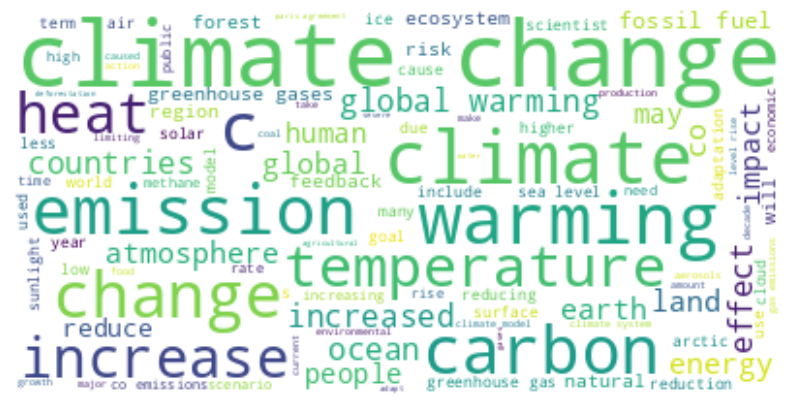

In [ ]:
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##Training the Word2Vec model
For this part you may want to follow a guide [here](https://rare-technologies.com/word2vec-tutorial/).

In [ ]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# TODO: Create the model, keep min_count = 4
# TODO: Save the model in file word2vec.bin to use it later


from gensim.models import Word2Vec

# Create Word2Vec model using tok_sent
# WRITE YOUR CODE HERE #

tok_sent = create_word2vec_list(sentences)
model = Word2Vec(tok_sent, min_count=4)
model.save("word2vec.bin")

In [ ]:
# TODO: Print the first 10 most common words. Use model.wv.index_to_key
# WRITE YOUR CODE HERE #
print(model.wv.index_to_key[:10])

['the', 'and', 'to', 'of', 'in', 'climate', 'a', 'is', 'change', 'are']


In [ ]:
# TODO: Look up the most similar words to word "climate" in your text using the model.wv.most_similar() function, print all similar words
# WRITE YOUR CODE HERE #
model.wv.most_similar("climate")

[('of', 0.999209463596344),
 ('in', 0.9991515874862671),
 ('to', 0.9991349577903748),
 ('the', 0.9991020560264587),
 ('that', 0.9990701675415039),
 ('and', 0.9990687966346741),
 ('a', 0.9988700747489929),
 ('for', 0.9988241195678711),
 ('is', 0.9987866282463074),
 ('energy', 0.9987198710441589)]

In [ ]:
# TODO: Find and print the vector of word "climate"
model.wv.get_vector("climate")

array([-0.07081052,  0.06845087,  0.05347925,  0.03501888, -0.01056577,
       -0.3276903 ,  0.13811852,  0.44807792, -0.18494484, -0.10078029,
       -0.10368729, -0.19741607, -0.07379317, -0.00663556, -0.01784458,
       -0.16088898,  0.01547734, -0.19697307, -0.07564607, -0.47877648,
        0.0704975 ,  0.01797783,  0.14082125, -0.21415584, -0.06672488,
        0.07514929, -0.0604193 , -0.17226428, -0.2906719 ,  0.0615437 ,
        0.20579365, -0.03403243,  0.1900329 , -0.21981579, -0.14480135,
        0.24215531,  0.05689999, -0.19506598, -0.15183619, -0.40915093,
        0.08474452, -0.19901842, -0.05499866, -0.03899008,  0.23610067,
       -0.12109086, -0.15581676, -0.04453593,  0.12688862,  0.14746985,
        0.13331173, -0.15519722,  0.06883103,  0.03480242, -0.05876651,
        0.01438318,  0.04875126, -0.00257148, -0.24236302,  0.06024131,
        0.10183853, -0.02369433,  0.12146455, -0.18603793, -0.23596202,
        0.14094558,  0.10613708,  0.22763348, -0.35169894,  0.20